<a href="https://colab.research.google.com/github/vaibhavi-c/DataScienceTools/blob/main/eeg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=e9b9b5734920aebe018e14bdf2ec4a9fa3c8ec49575e94c57f5ef843b18ecbec
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [ ]:
import mne
from mne import Epochs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mplcursors

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file = "/content/drive/MyDrive/eeg_data/s01_051017m.set"
sample_eeg = mne.io.read_raw_eeglab(file, preload=True)

In [ ]:
print(sample_eeg)

In [ ]:
print(sample_eeg.info)

In [ ]:
# methods of the eeg object
# dir(sample_eeg)

In [ ]:
# event annotations
# event_annotations = mne.events_from_annotations (sample_eeg)

In [ ]:
events, event_ids = mne.events_from_annotations(sample_eeg)

In [ ]:
print(events)

[[   6772       0       2]
 [   7182       0       3]
 [   8570       0       4]
 ...
 [1804250       0       1]
 [1804594       0       3]
 [1805312       0       4]]


In [ ]:
print(type(events))

<class 'numpy.ndarray'>


In [ ]:
print(event_ids)

{'251': 1, '252': 2, '253': 3, '254': 4}


In [ ]:
count_of_events = mne.count_events(events, ids=None)
print(count_of_events)

{1: 95, 2: 104, 3: 199, 4: 199}


In [ ]:
# converting events array to a dataframe
events_df = pd.DataFrame(events, columns=['Onset timestamp', 'idk', 'Event_id'])
print(events_df)

     Onset timestamp  idk  Event_id
0               6772    0         2
1               7182    0         3
2               8570    0         4
3              11078    0         1
4              11646    0         3
..               ...  ...       ...
592          1801082    0         3
593          1801876    0         4
594          1804250    0         1
595          1804594    0         3
596          1805312    0         4

[597 rows x 3 columns]


In [ ]:
del events_df['idk']
print(events_df)

     Onset timestamp  Event_id
0               6772         2
1               7182         3
2               8570         4
3              11078         1
4              11646         3
..               ...       ...
592          1801082         3
593          1801876         4
594          1804250         1
595          1804594         3
596          1805312         4

[597 rows x 2 columns]


In [ ]:
events_df['Prev_Onset'] = events_df['Onset timestamp'].shift(1)
events_df['Prev Event_id'] = events_df['Event_id'].shift(1)
print(events_df)

     Onset timestamp  Event_id  Prev_Onset  Prev Event_id
0               6772         2         NaN            NaN
1               7182         3      6772.0            2.0
2               8570         4      7182.0            3.0
3              11078         1      8570.0            4.0
4              11646         3     11078.0            1.0
..               ...       ...         ...            ...
592          1801082         3   1800690.0            2.0
593          1801876         4   1801082.0            3.0
594          1804250         1   1801876.0            4.0
595          1804594         3   1804250.0            1.0
596          1805312         4   1804594.0            3.0

[597 rows x 4 columns]


In [ ]:
events_df['Reaction Time(ms)'] = events_df.loc[events_df['Event_id'] == 3, 'Onset timestamp'] - events_df['Prev_Onset']
print(events_df)

     Onset timestamp  Event_id  Prev_Onset  Prev Event_id  Reaction Time(ms)
0               6772         2         NaN            NaN                NaN
1               7182         3      6772.0            2.0              410.0
2               8570         4      7182.0            3.0                NaN
3              11078         1      8570.0            4.0                NaN
4              11646         3     11078.0            1.0              568.0
..               ...       ...         ...            ...                ...
592          1801082         3   1800690.0            2.0              392.0
593          1801876         4   1801082.0            3.0                NaN
594          1804250         1   1801876.0            4.0                NaN
595          1804594         3   1804250.0            1.0              344.0
596          1805312         4   1804594.0            3.0                NaN

[597 rows x 5 columns]


In [ ]:
events_df = events_df.dropna()
events_df.loc[:, 'Prev Event_id'] = events_df['Prev Event_id'].astype(int)
print(events_df)

     Onset timestamp  Event_id  Prev_Onset  Prev Event_id  Reaction Time(ms)
1               7182         3      6772.0              2              410.0
4              11646         3     11078.0              1              568.0
7              17514         3     16996.0              2              518.0
10             22520         3     22128.0              2              392.0
13             26590         3     26164.0              2              426.0
..               ...       ...         ...            ...                ...
583          1789614         3   1789038.0              2              576.0
586          1794312         3   1793962.0              1              350.0
589          1798016         3   1797514.0              2              502.0
592          1801082         3   1800690.0              2              392.0
595          1804594         3   1804250.0              1              344.0

[199 rows x 5 columns]


<ipython-input-16-4f7c0531466a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df.loc[:, 'Prev Event_id'] = events_df['Prev Event_id'].astype(int)
<ipython-input-16-4f7c0531466a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  events_df.loc[:, 'Prev Event_id'] = events_df['Prev Event_id'].astype(int)


In [ ]:
events_df.reset_index(drop=True, inplace=True)

In [ ]:
events_df

,Onset timestamp,Event_id,Prev_Onset,Prev Event_id,Reaction Time(ms)
0,7182,3,6772.0,2,410.0
1,11646,3,11078.0,1,568.0
2,17514,3,16996.0,2,518.0
3,22520,3,22128.0,2,392.0
4,26590,3,26164.0,2,426.0
...,...,...,...,...,...
194,1789614,3,1789038.0,2,576.0
195,1794312,3,1793962.0,1,350.0
196,1798016,3,1797514.0,2,502.0
197,1801082,3,1800690.0,2,392.0


from matplotlib import pyplot as plt
events_df['Onset timestamp'].plot(kind='hist', bins=20, title='Onset timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df['Prev_Onset'].plot(kind='hist', bins=20, title='Prev_Onset')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df['Prev Event_id'].plot(kind='hist', bins=20, title='Prev Event_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df['Reaction Time(ms)'].plot(kind='hist', bins=20, title='Reaction Time(ms)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df.plot(kind='scatter', x='Onset timestamp', y='Prev_Onset', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df.plot(kind='scatter', x='Prev_Onset', y='Prev Event_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
events_df.plot(kind='scatter', x='Prev Event_id', y='Reaction Time(ms)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Onset timestamp']
  ys = series['Prev Event_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('Prev Event_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Onset timestamp']
  ys = series['Reaction Time(ms)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('Reaction Time(ms)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Onset timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Onset timestamp'}, axis=1)
              .sort_values('Onset timestamp', ascending=True))
  xs = counted['Onset timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Event_id']
  ys = series['Prev Event_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = events_df.sort_values('Event_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Event_id')
_ = plt.ylabel('Prev Event_id')

from matplotlib import pyplot as plt
events_df['Onset timestamp'].plot(kind='line', figsize=(8, 4), title='Onset timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
events_df['Prev_Onset'].plot(kind='line', figsize=(8, 4), title='Prev_Onset')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
events_df['Prev Event_id'].plot(kind='line', figsize=(8, 4), title='Prev Event_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
events_df['Reaction Time(ms)'].plot(kind='line', figsize=(8, 4), title='Reaction Time(ms)')
plt.gca().spines[['top', 'right']].set_visible(False)

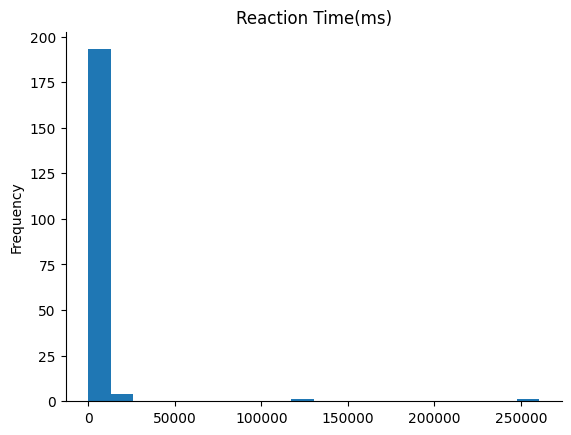

In [ ]:
from matplotlib import pyplot as plt
events_df['Reaction Time(ms)'].plot(kind='hist', bins=20, title='Reaction Time(ms)')
plt.gca().spines[['top', 'right',]].set_visible(False)

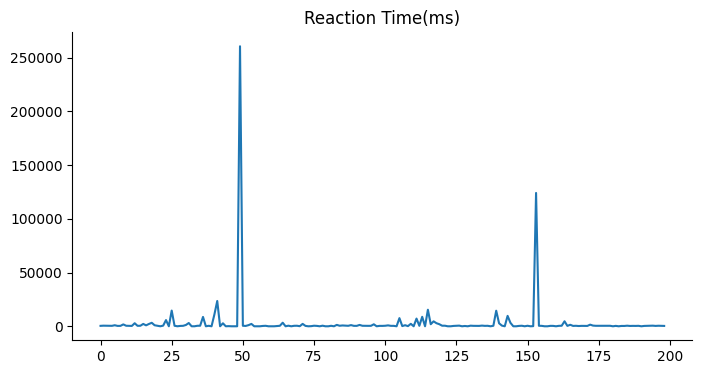

In [ ]:
from matplotlib import pyplot as plt
events_df['Reaction Time(ms)'].plot(kind='line', figsize=(8, 4), title='Reaction Time(ms)')
plt.gca().spines[['top', 'right']].set_visible(False)

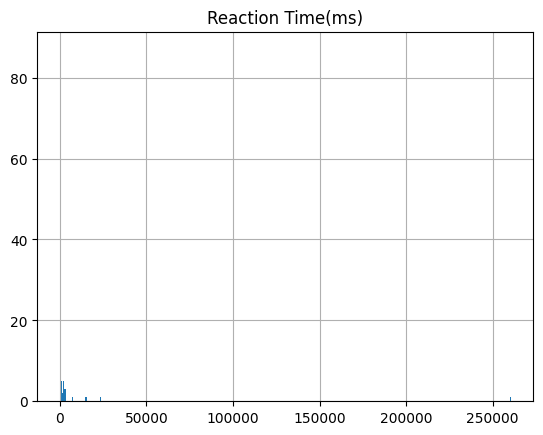

In [ ]:
# plotting histogram of reaction times and binning them
hist = events_df.hist(column='Reaction Time(ms)',bins=1000)

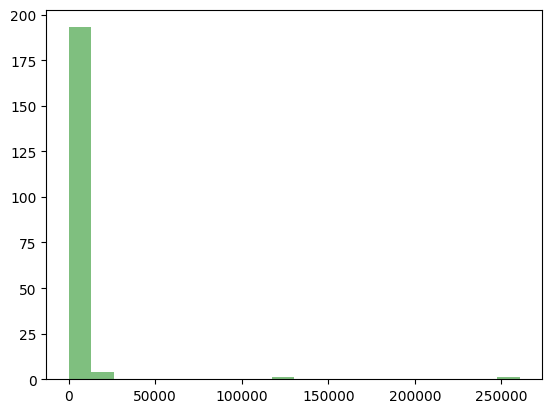

In [ ]:
reaction_times = events_df['Reaction Time(ms)']
# plot histogram
plt.hist(reaction_times, bins=20, alpha=0.5, color='g')

# add interactive cursors
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
# reaction time in seconds
reaction_times = reaction_times/1000

In [ ]:
reaction_times

0      0.410
1      0.568
2      0.518
3      0.392
4      0.426
       ...  
194    0.576
195    0.350
196    0.502
197    0.392
198    0.344
Name: Reaction Time(ms), Length: 199, dtype: float64

In [ ]:
# calculate histogram
counts, bin_edges = np.histogram(reaction_times, bins=30)

# print bin edges
print(bin_edges)

[8.000000e-03 8.689600e+00 1.737120e+01 2.605280e+01 3.473440e+01
 4.341600e+01 5.209760e+01 6.077920e+01 6.946080e+01 7.814240e+01
 8.682400e+01 9.550560e+01 1.041872e+02 1.128688e+02 1.215504e+02
 1.302320e+02 1.389136e+02 1.475952e+02 1.562768e+02 1.649584e+02
 1.736400e+02 1.823216e+02 1.910032e+02 1.996848e+02 2.083664e+02
 2.170480e+02 2.257296e+02 2.344112e+02 2.430928e+02 2.517744e+02
 2.604560e+02]


In [ ]:
print("Count of reaction times: ",counts)
print("No. of bins: ",len(counts))

Count of reaction times:  [189   7   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1]
No. of bins:  30


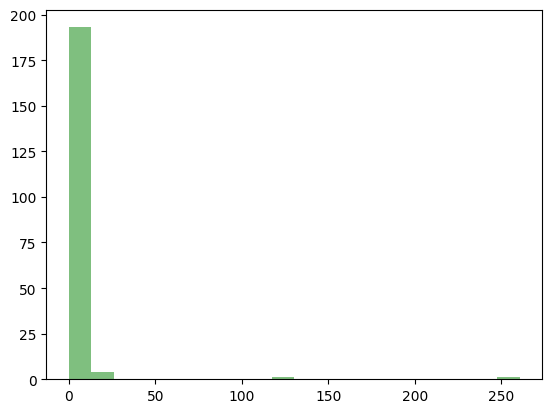

In [ ]:
# plot histogram
plt.hist(reaction_times, bins=20, alpha=0.5, color='g')

# add interactive cursors
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
# statistical information regarding the reaction times
events_df['Reaction Time(ms)'].describe()

count       199.000000
mean       3133.738693
std       20496.625638
min           8.000000
25%         176.000000
50%         426.000000
75%         598.000000
max      260456.000000
Name: Reaction Time(ms), dtype: float64

In [ ]:
# considering max reaction time of 4 seconds
max_reaction_time = 400

In [ ]:
new_events_df = events_df.copy()

In [ ]:
to_drop_indices = new_events_df[(new_events_df['Reaction Time(ms)'] > 400)].index

In [ ]:
print(len(to_drop_indices))

90


In [ ]:
new_events_df.drop(to_drop_indices, inplace=True)
new_events_df.reset_index(drop=True, inplace=True)
new_events_df

,Onset timestamp,Event_id,Prev_Onset,Prev Event_id,Reaction Time(ms)
0,22520,3,22128.0,2,392.0
1,38618,3,38260.0,1,358.0
2,42964,3,42572.0,1,392.0
3,65382,3,65046.0,1,336.0
4,128592,3,128584.0,1,8.0
...,...,...,...,...,...
85,1769538,3,1769530.0,2,8.0
86,1774620,3,1774276.0,1,344.0
87,1794312,3,1793962.0,1,350.0
88,1801082,3,1800690.0,2,392.0


from matplotlib import pyplot as plt
new_events_df['Onset timestamp'].plot(kind='hist', bins=20, title='Onset timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Prev_Onset'].plot(kind='hist', bins=20, title='Prev_Onset')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Prev Event_id'].plot(kind='hist', bins=20, title='Prev Event_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Reaction Time(ms)'].plot(kind='hist', bins=20, title='Reaction Time(ms)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df.plot(kind='scatter', x='Onset timestamp', y='Prev_Onset', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df.plot(kind='scatter', x='Prev_Onset', y='Prev Event_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_events_df.plot(kind='scatter', x='Prev Event_id', y='Reaction Time(ms)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Onset timestamp']
  ys = series['Prev Event_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('Prev Event_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Onset timestamp']
  ys = series['Reaction Time(ms)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('Reaction Time(ms)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Onset timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Onset timestamp'}, axis=1)
              .sort_values('Onset timestamp', ascending=True))
  xs = counted['Onset timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_events_df.sort_values('Onset timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Onset timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Event_id']
  ys = series['Prev Event_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_events_df.sort_values('Event_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Event_id')
_ = plt.ylabel('Prev Event_id')

from matplotlib import pyplot as plt
new_events_df['Onset timestamp'].plot(kind='line', figsize=(8, 4), title='Onset timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Prev_Onset'].plot(kind='line', figsize=(8, 4), title='Prev_Onset')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Prev Event_id'].plot(kind='line', figsize=(8, 4), title='Prev Event_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_events_df['Reaction Time(ms)'].plot(kind='line', figsize=(8, 4), title='Reaction Time(ms)')
plt.gca().spines[['top', 'right']].set_visible(False)

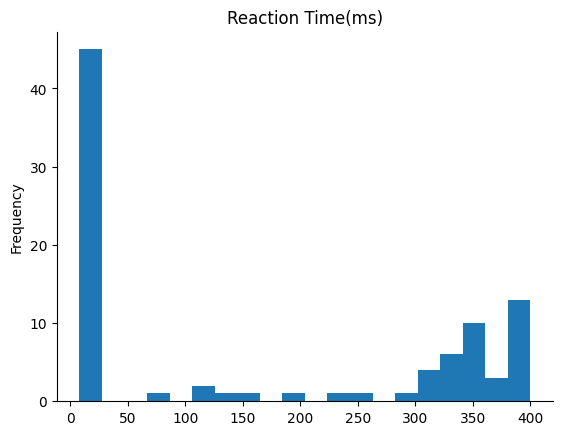

In [ ]:
from matplotlib import pyplot as plt
new_events_df['Reaction Time(ms)'].plot(kind='hist', bins=20, title='Reaction Time(ms)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
new_events_df['Reaction Time(ms)'].describe()

count     90.000000
mean     165.777778
std      168.604436
min        8.000000
25%        8.000000
50%       54.000000
75%      348.500000
max      400.000000
Name: Reaction Time(ms), dtype: float64

In [ ]:
new_rts = new_events_df['Reaction Time(ms)']
# calculate histogram
counts, bin_edges = np.histogram(new_rts, bins=30)

# print bin edges
print("Bin edges: ",bin_edges)
print("Count of reaction times: ",counts)
print("No. of bins: ",len(counts))

Bin edges:  [  8.          21.06666667  34.13333333  47.2         60.26666667
  73.33333333  86.4         99.46666667 112.53333333 125.6
 138.66666667 151.73333333 164.8        177.86666667 190.93333333
 204.         217.06666667 230.13333333 243.2        256.26666667
 269.33333333 282.4        295.46666667 308.53333333 321.6
 334.66666667 347.73333333 360.8        373.86666667 386.93333333
 400.        ]
Count of reaction times:  [44  1  0  0  0  1  0  0  2  0  1  1  0  0  1  0  1  0  1  0  0  1  1  3
  5  4  7  2  5  9]
No. of bins:  30


In [ ]:
# print(type(bin_edges))
bin_sizes = np.diff(bin_edges)

print(bin_sizes)
print(len(bin_sizes))

[13.06666667 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667
 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667
 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667
 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667
 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667 13.06666667]
30


In [ ]:
# dir(mne)

In [ ]:
# epoching
# tmin = -0.2
# tmax = 4

# epochs = Epochs(sample_eeg, events, event_ids, tmin, tmax)

In [ ]:
# print(epochs)

In [ ]:
# need to epoch for only a few event_ids

In [ ]:
# returned is (1) an events array and (2) a dictionary of event_id. event_id is passed for epoching
# print(event_annotations)

In [ ]:
#  cant usethe below function as no stim channels in the data
# finding_events = mne.find_events(sample_eeg, stim_channel=None, output='onset')

In [ ]:
# event array
# events = np.array(event_annotations)

In [ ]:
# print(events)